In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

def mlpclass(y):
    y = y[0]
    res = [np.sign(e) for e in y]
    return res

def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

def label2target(c,nb_classe):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((nb_classe,n))
    for i in range(n):
        res[c[i],i] = 1
    return res

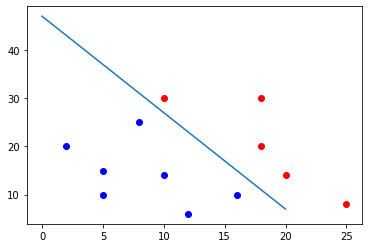

In [2]:
X = np.array([[18,20,10,25,18,16,5,12,2,5,10,8],[30,14,30,8,20,10,15,6,20,10,14,25]])
Y = np.array([0,0,0,0,0,1,1,1,1,1,1,1]).T
Y = np.reshape(Y,(12,1))

XX = np.array([[5,10,17.5,10,10],[10,14,14,25,30]])
YY = np.array([1,1,0,1,0]).T
YY = np.reshape(YY,(5,1))

x = np.linspace(0,20,100)
y = [47 - 2*e for e in x]
plt.plot(X[0][0:5],X[1][0:5],'o',color='red')
plt.plot(X[0][5:12],X[1][5:12],'o',color='blue')
plt.plot(x,y)
plt.show()

In [54]:
X = np.random.randint(0,30,(2,1000))
def decision(x):
    if  2*x[0] + x[1] - 25 > 0:
        return 1
    else:
        return -1
Y = np.zeros((1000,1))
for i in range(1000):
    Y[i] = decision(X[:,i])

XX = np.random.randint(0,30,(2,100))
def decision(x):
    if  2*x[0] + x[1] - 25 > 0:
        return 1
    else:
        return -1
YY = np.zeros((100,1))
for i in range(100):
    YY[i] = decision(XX[:,i])


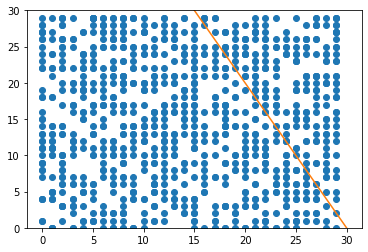

In [72]:
x = np.linspace(0,30,100)
y = [0 - 2*e for e in x]
plt.plot(X[0],X[1],'o')
plt.ylim([0,30])
#plt.plot(X[0][5:12],X[1][5:12],'o',color='blue')
plt.plot(x,y)
plt.show()

In [37]:
%qtconsole

In [12]:
class NeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, n_out):
        #Matrice d'entrée augmentée
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        #Matrice de poids aléatoires entre 0 et w_sup
        self.weights     = (np.random.rand(self.input_train.shape[0],n_out)-np.random.randint(0,2,(self.input_train.shape[0],n_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        #Calcul une propagation dans le réseau avec les données d'entrainement si train = True
        #et avec les données de test si train = False
        if train == True:
            self.output= np.dot(self.input_train.T, self.weights)
        else:
            self.output = np.dot(self.input_test.T, self.weights)

    def backprop(self, lr):
        #Calcul de l'erreur
        self.error =  self.output - self.y_train
        #Calcul de la matrice d'évolution des poids
        d_weights = np.dot(self.input_train, 2*self.error)
        #Calcul des nouveaux poids
        self.weights -= lr*d_weights
        
    def train(self, it, lr):
        #Entraine le réseau de neurones et complète une liste errrors des erreurs quadratiques
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        #Teste la performance du réseau sur la base d'entrainement si train = True, base de test sinon
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

In [69]:
nn = NeuralNetwork(X,Y,XX,YY, w_sup = 1, n_out = 1)
it, lr = 1, 1e-5
nn.train(it,lr)

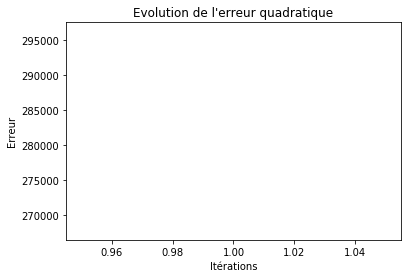

{'nb': 800, 'taux': 0.8}


In [70]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
print(nn.test(train = True))

In [35]:
nn.weights

array([[ 0.05140983],
       [-0.0019625 ],
       [ 0.02279604]])